# ***Práctica 3*** : _Tarea de regresión_ #

## ***Dataset:*** _Conjunto de datos de obesidad._ ##

### ***Alumna: Roxana Rachel Valencia Ortega*** ###

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [196]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error

### Impresión de datos con pandas ###

In [197]:
df = pd.read_csv(r'obesity.csv')
print(df)

      ID  Age  Gender  Height  Weight   BMI          Label
0      1   25    Male     175      80  25.3  Normal Weight
1      2   30  Female     160      60  22.5  Normal Weight
2      3   35    Male     180      90  27.3     Overweight
3      4   40  Female     150      50  20.0    Underweight
4      5   45    Male     190     100  31.2          Obese
..   ...  ...     ...     ...     ...   ...            ...
103  106   11    Male     175      10   3.9    Underweight
104  107   16  Female     160      10   3.9    Underweight
105  108   21    Male     180      15   5.6    Underweight
106  109   26  Female     150      15   5.6    Underweight
107  110   31    Male     190      20   8.3    Underweight

[108 rows x 7 columns]


### Estadísticas descriptivas ###

Este tipo de código nos permite comprender el conjunto de datos.

In [198]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


### Pruebas de tipo de datos ###

Es necesario realizar una prueba de los datos antes de procesarlos, por lo que no todos los datos sea posibles procesar.

In [199]:
df.dtypes

ID          int64
Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object

Con ayuda de este código nos percatamos que todas las columnas están listas para usar, en excepto gender (object), lo que significa que no es posible utilizar ese tipo de datos directamente en los cálculos.

### Técnica de modificación ###
Se codificará la columna (Gender) a valores binarios, utilizando LabelEncoder.

In [200]:
le= LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,Normal Weight
1,2,30,0,160,60,22.5,Normal Weight
2,3,35,1,180,90,27.3,Overweight
3,4,40,0,150,50,20.0,Underweight
4,5,45,1,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,1,175,10,3.9,Underweight
104,107,16,0,160,10,3.9,Underweight
105,108,21,1,180,15,5.6,Underweight
106,109,26,0,150,15,5.6,Underweight


Utilizando el concepto de correlación se refiere a la dependencia de los valores de una columna con valores de otra columna, el cual representa como el cambio en una columna afectara a otras columnas. Para este conjunto de datos se tienen columnas que son conceptualmente independientes de otras o son el resultado de un cálculo aritmético entre otras columnas, que se verán afectadas. Así mismo no obtendremos buenos resultados. En su lugar, eliminaremos solamente la columna ID.

In [201]:
df.drop(labels='ID',axis=1,inplace=True)
df

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,Normal Weight
1,30,0,160,60,22.5,Normal Weight
2,35,1,180,90,27.3,Overweight
3,40,0,150,50,20.0,Underweight
4,45,1,190,100,31.2,Obese
...,...,...,...,...,...,...
103,11,1,175,10,3.9,Underweight
104,16,0,160,10,3.9,Underweight
105,21,1,180,15,5.6,Underweight
106,26,0,150,15,5.6,Underweight


### Variables ### 
Se definen las variables dependientes e independientes.

In [231]:
y=df['BMI']#Variables dependiente
x1=df['Age'] #Variable independiente

### Exploración de datos ###

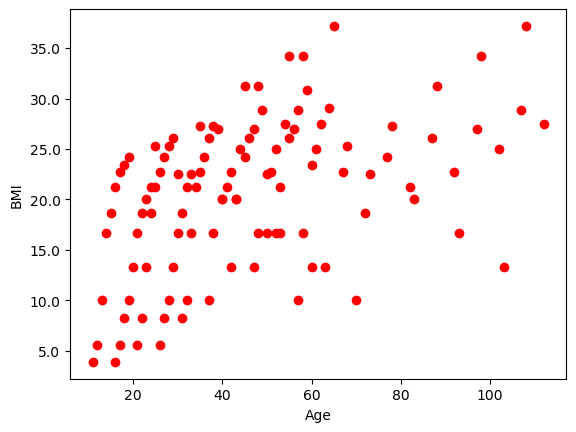

In [230]:
plt.scatter(x1, y, c='r', label='Points')
plt.xlabel('Age', fontsize = 10)
plt.ylabel('BMI', fontsize = 10)
plt.gca().yaxis.set_major_formatter('{:.1f}'.format)
plt.show()

Esta gráfica de dispersión nos permite visualizar la distribución de los valores, se aprecia un ligero aumento en el nivel medio de BMI en personas con diagnóstico de sobrepeso en el rango de edad de 20 a 60 años. Esto sugiere una posible correlación entre Age y BMI.

### Regresión lineal ###

El siguiente codigo nos permite sumar el término desesgo o intersección.

In [204]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     30.75
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.17e-07
Time:                        22:59:39   Log-Likelihood:                -357.80
No. Observations:                 108   AIC:                             719.6
Df Residuals:                     106   BIC:                             725.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7766      1.381      9.973      0.000      11.038      16.515
Age            0.1455      0.026      5.545      0.000       0.093       0.197
==============================================================================
Omnibus:                        6.877   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.063
Skew:                          -0.288   Prob(JB):                        0.131
Kurtosis:                       2.244   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Variables ###

Se definen las variables dependientes e independientes

In [234]:
X=data[['Height','Weight']]#Variables independientes.
y=data['BMI']#Variable dependientes.

In [235]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelado de regresión lineal ###

In [236]:
model = LinearRegression()
model.fit(X_train, y_train)#Modelo de entrenamiento.

LinearRegression()

In [246]:
y_pred = model.predict(X_test)#Conjunto de datos de prueba.

In [238]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 2.619435864668299
R-squared (R2): 0.9570721105859615


Estas metricas son de gran ayuda para evaluar el rendimiento del modelo de regresión lineal al proporcionar información sobre la calidad de las predicciones y en cuanto el modelo a los datos reales.

### Gráfica de dispersión ###

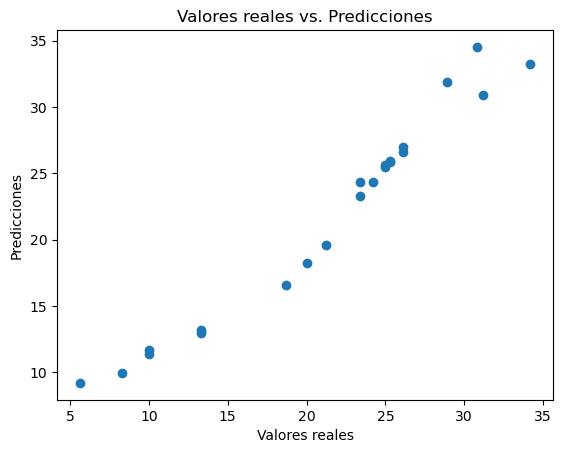

In [239]:
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs. Predicciones")
plt.show()

Este codigo nos permite visualizar de manera efectiva cómo se comparan los valores reales con las predicciones del modelo de regresión lineal. Esto es útil para evaluar visualmente el rendimiento del modelo y determinar si las predicciones se ajustan bien a los datos reales.

In [250]:
model = LinearRegression()
X_train = X_train.values

In [251]:
print(len(X_train))
print(len(y_train))

86
86


### Gráfica de dispersión de R^2 ###

R-squared (R²): 0.9570721105859615


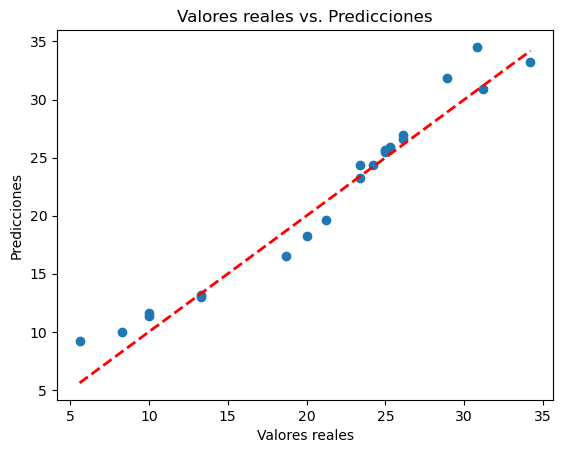

In [252]:
# Cargar tus datos y seleccionar las características y la variable objetivo
X = df[['Height', 'Weight']]
y = df['BMI']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el valor de R²
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

# Graficar la regresión lineal
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs. Predicciones")

# Agregar una línea de referencia y=x
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.show()


Este código se encarga de carga los datos, entrena un modelo de regresión lineal, realiza predicciones en un conjunto de prueba, calcula el coeficiente de determinación R² para evaluar el modelo y crea un gráfico de dispersión para visualizar cómo se comparan las predicciones con los valores reales. La línea de referencia ayuda a evaluar visualmente la calidad del modelo teniendo como resultado (R²): 0.9570721105859615. 

## Conclusión ##

El análisis de regresión lineal en los datos de obesidad reveló cómo las variables como la edad, altura y peso se relacionan con el índice de masa corporal (BMI). El modelo de regresión lineal mostró un buen ajuste a los datos, con un coeficiente de determinación (R²) de 0.9570, lo que indica una alta capacidad de predicción. Aunque siempre hay margen para mejorar, este resultado es sólido. Estos modelos son herramientas valiosas para el diagnóstico y la comprensión de la obesidad, lo que puede tener un impacto positivo en la toma de decisiones médicas y las estrategias de salud pública